In [1]:
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum

## Predicting outcome of the battle (first part of the task)

In [2]:
def calc_A(a, b, A0, B0, t):
    return A0 * np.cosh(np.sqrt(a*b) * t) - B0*np.sqrt(a/b)*np.sinh(np.sqrt(a*b) * t)

def calc_B(a, b, A0, B0, t):
    return B0 * np.cosh(np.sqrt(a*b) * t) - A0*np.sqrt(b/a)*np.sinh(np.sqrt(a*b) * t)

# time range
ts = (np.arange(0, 100, 0.01))

In [3]:
def moment_when_battle_is_over(a, b, A0, B0, ts):
    for t in ts:
        At = calc_A(a, b, A0, B0, t)
        Bt = calc_B(a, b, A0, B0, t)
        if At <= 0 or Bt <= 0:
            return t
    return None  # Return None if the battle is not over within the given time range

In [4]:
class Outcome(Enum):
    winner_A, winner_B, draw = range(1, 4)

def predict_outcome(a, b, A0, B0):
    if b * (A0**2) > a * (B0 ** 2):
        print("Winner is A !!!")
        return Outcome.winner_A
    elif  b * (A0**2) < a * (B0 ** 2):
        print("Winner is B !!!")
        return Outcome.winner_B
    else:
        print ("It's a draw !!!")
        return Outcome.draw

In [5]:
def battle(a, b, A0, B0, ts):
    #moment in which the battle is over needs to be calculated, othewise the graph would not make any sense
    # beacuse army size is approaching +inf as t gets bigger
    moment = moment_when_battle_is_over(a, b, A0, B0, ts)
    outcome = predict_outcome(a, b, A0, B0)
    if(outcome == Outcome.draw):
        moment = 10
    if (moment is None and outcome != Outcome.draw):
            raise AttributeError("Time range (ts) is not large enough")
        
    ts = np.arange(0, moment, 0.0001)
    
    At = calc_A(a, b, A0, B0, ts)
    Bt = calc_B(a, b, A0, B0, ts)
    
    plt.title(f"a = {a}, b = {b}, A0 = {A0}, B0 = {B0}")
    plt.xlabel("[ t ]")
    plt.ylabel("Num of soliders")
    plt.plot(ts, At, color = 'red', label = 'Army A')
    plt.plot(ts, Bt, color = 'blue', label = 'Army B')
    
    plt.legend(loc = 'best', frameon = True)

Winner is A !!!


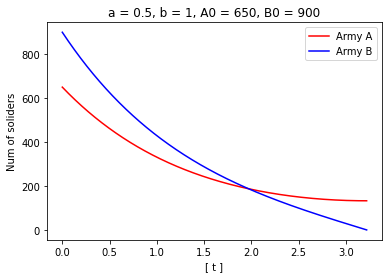

In [6]:
battle(0.5, 1, 650, 900, ts)

It's a draw !!!


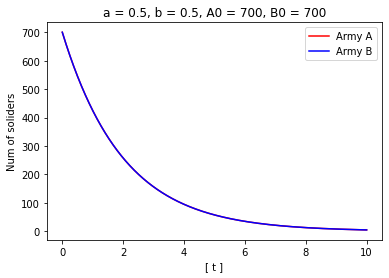

In [7]:
battle(0.5, 0.5, 700, 700, ts)

## An Ambush (second and final part of the task)

In [8]:
#find c, then calc f
# then you can define some time range and calc A and B
# all that is left to do is to plot the results

In [9]:
def find_c(A0, f):
    return (A0 + np.sqrt(f))/(A0 - np.sqrt(f)) 

In [10]:
def calc_A_ambush(a,b, f, c, t):
    return np.sqrt(f) + (2*np.sqrt(f)) / (c * np.e ** (b*t*np.sqrt(f)) - 1)

In [11]:
def calc_B_ambush(a,b,f,c, t):
    return ((2/a) * (f * c * b * np.e**(b*t*np.sqrt(f)))) / ((c*np.e**(b*t*np.sqrt(f)) - 1)**2)

In [12]:
def moment_battle_is_over_ambush(B, step):
        for i in range(len(B)):
            if B[i] <= 0:
                return i * step
        return None

In [13]:
ts = np.arange(0, 100, 0.01)

In [14]:
def battle_ambush(a, b, A0, B0, t_upper_bound = 0.5):
    f = A0**2 - (2*a/b)*B0
    c = find_c(A0, f)
    #all battles with an ambush end quickly so we adjust time range length manually (default is one)
    t = np.arange(0, t_upper_bound, 0.001)
    At = calc_A_ambush(a,b,f,c, t)
    Bt = calc_B_ambush(a,b,f,c, t)
    
    plt.title(f"B is ambushed\na = {a}, b = {b}, A0 = {A0}, B0 = {B0}")
    plt.xlabel("[ t ]")
    plt.ylabel("Num of soliders")
    plt.plot(t, At, color = 'red', label = 'Army A')
    plt.plot(t, Bt, color = 'blue', label = 'Army B')
    
    plt.legend(loc = 'best', frameon = True)

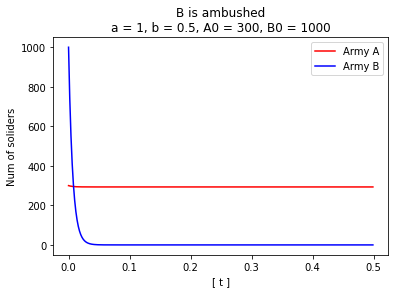

In [15]:
battle_ambush(1, 0.5, 300, 1000)